In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

plt.gray()

<Figure size 432x288 with 0 Axes>

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
y_train_onehot = tf.cast(tf.one_hot(y_train, 10), tf.float32)
y_test_onehot = tf.cast(tf.one_hot(y_test, 10), tf.float32)

In [ ]:
x_train = tf.expand_dims(tf.cast(x_train, tf.float32), -1) / 255.0
x_test = tf.expand_dims(tf.cast(x_test, tf.float32), -1) / 255.0

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test_onehot))

In [ ]:
train_dataset = train_dataset.shuffle(x_train.shape[0], reshuffle_each_iteration=True)
test_dataset = test_dataset.shuffle(x_test.shape[0], reshuffle_each_iteration=False)

In [ ]:
train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

(32, 28, 28, 1) (32, 10)


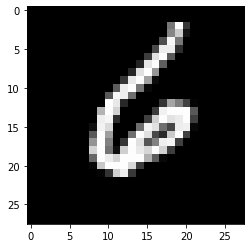

In [ ]:
for el in train_dataset.take(1):
  print(el[0].shape, el[1].shape)

  plt.imshow(el[0][0,:,:,0])
  plt.show()

In [ ]:
def plot_history(h):
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
input_im = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 5, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
#x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_1_model_adam = tf.keras.Model(input_im, x)

cnn_1_model_adam.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        832       
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_17 (ReLU)             (None, 14, 14, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 64)          18496     
                                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_1_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_1_model_adam = cnn_1_model_adam.fit(train_dataset, validation_data = test_dataset, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1797 - accuracy: 0.9454 - val_loss: 0.0904 - val_accuracy: 0.9721
Epoch 2/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.0546 - val_accuracy: 0.9821
Epoch 3/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 4/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0430 - val_accuracy: 0.9864
Epoch 5/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0369 - val_accuracy: 0.9886
Epoch 6/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0376 - val_accuracy: 0.9883


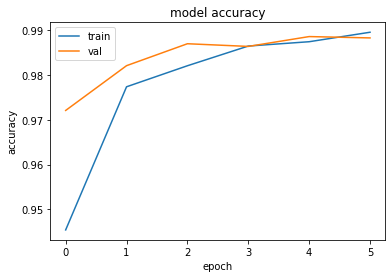

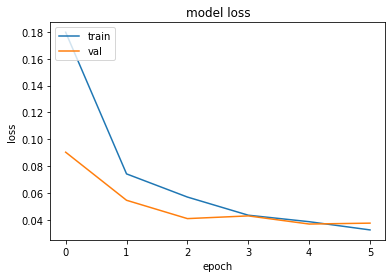

In [ ]:
plot_history(h_cnn_1_model_adam)

In [ ]:
input_im = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation=None, kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.AveragePooling2D()(x)

#x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_2_model_adam = tf.keras.Model(input_im, x)

cnn_2_model_adam.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 dropout_8 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_19 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_19 (ReLU)             (None, 28, 28, 32)        0         
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                 

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_2_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_2_model_adam = cnn_2_model_adam.fit(train_dataset, validation_data = test_dataset, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1280 - accuracy: 0.9615 - val_loss: 0.0442 - val_accuracy: 0.9859
Epoch 2/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0549 - accuracy: 0.9824 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 3/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0293 - val_accuracy: 0.9907
Epoch 4/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 5/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0249 - val_accuracy: 0.9918
Epoch 6/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0259 - val_accuracy: 0.9921


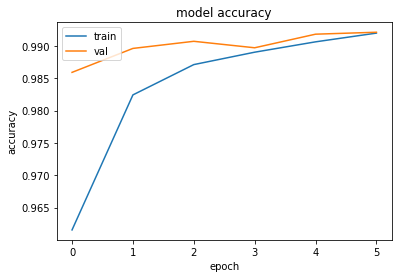

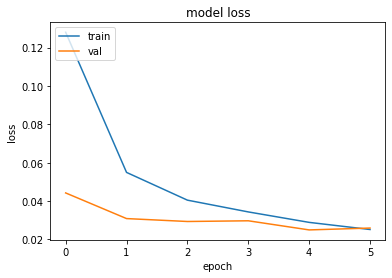

In [ ]:
plot_history(h_cnn_2_model_adam)

https://paperswithcode.com/sota/image-classification-on-mnist

In [ ]:
input_im = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation=None, kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
#x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_3_model_adam = tf.keras.Model(input_im, x)

cnn_3_model_adam.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 dropout_14 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_31 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_31 (ReLU)             (None, 28, 28, 32)        0         
                                                                 
 average_pooling2d_12 (Avera  (None, 14, 14, 32)       0         
 gePooling2D)                                             

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_3_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_3_model_adam = cnn_3_model_adam.fit(train_dataset, validation_data = test_dataset, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9518 - accuracy: 0.7642 - val_loss: 0.4821 - val_accuracy: 0.8593
Epoch 2/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3392 - accuracy: 0.9192 - val_loss: 0.5269 - val_accuracy: 0.8209
Epoch 3/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2224 - accuracy: 0.9436 - val_loss: 0.3635 - val_accuracy: 0.8846
Epoch 4/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1735 - accuracy: 0.9545 - val_loss: 0.3728 - val_accuracy: 0.8714
Epoch 5/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1449 - accuracy: 0.9612 - val_loss: 0.4370 - val_accuracy: 0.8477
Epoch 6/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1271 - accuracy: 0.9657 - val_loss: 0.1436 - val_accuracy: 0.9552


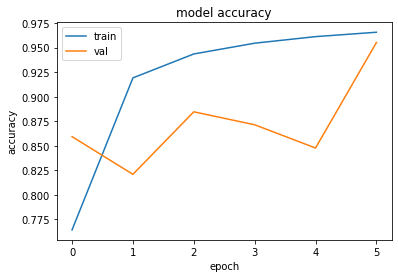

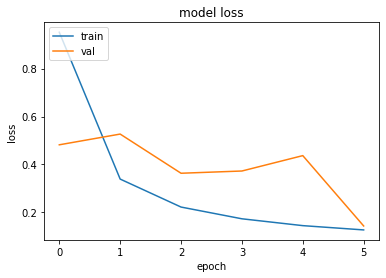

In [ ]:
plot_history(h_cnn_3_model_adam)